In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import mode

In [5]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff') # 70000 imágenes de 28x28 píxels
data = mnist.data / 255 # Normalizar datos entre 0 y 1


Visualizando algunos de los dígitos originales del dataset...


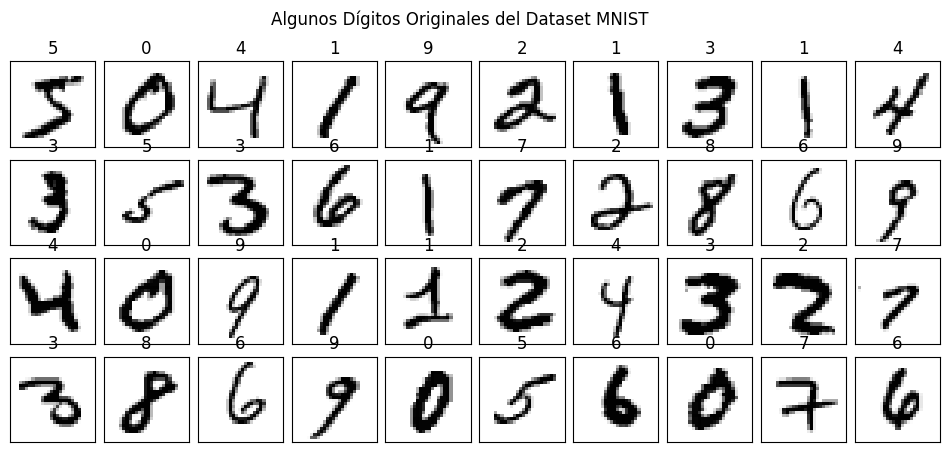

In [11]:
print("Visualizando algunos de los dígitos originales del dataset...")
fig, axes = plt.subplots(4, 10, figsize=(12, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(28, 28), cmap='binary')
    ax.set_title(mnist.target[i])
plt.suptitle("Algunos Dígitos Originales del Dataset MNIST")
plt.show()

In [8]:
pca = PCA(n_components=0.95) # COmponentes que expliquen el 95% de la varianza
start_time = time.time()
data_pca = pca.fit_transform(data)
end_time = time.time()

print(f"Tiempo de ejecución PCA: {end_time - start_time:.2f} segundos")
print(f"Número de componentes seleccionadas: {pca.n_components_}")

Tiempo de ejecución PCA: 2.83 segundos
Número de componentes seleccionadas: 154


In [16]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)

labels_map = np.zeros(10)
for i in range(10):
    mask = kmeans_labels == i # Genera una lista con 0 y 1 (1 cuando la etiqueta coincide con la asignada por kmeans)
    # Convertir mnist.target a tipo numérico antes de usar mode
    labels_map[i] = mode(mnist.target[mask].astype(int), keepdims=True)[0][0] # Busca el número más común (usando las etiquetas originales y le reasigna ese número a kmeans)

labels_pred = np.array([labels_map[label] for label in kmeans_labels])

accuracy = accuracy_score(mnist.target.astype(int), labels_pred) # También convertir mnist.target a int para accuracy_score
accuracy

0.5848428571428571

/tmp/ipython-input-151805942.py:18: UserWarning: Mismatched number of handles and labels: len(handles) = 8 len(labels) = 10
  axes[1].legend(handles=scatter2.legend_elements()[0], labels=[f'C{i}' for i in range(10)])


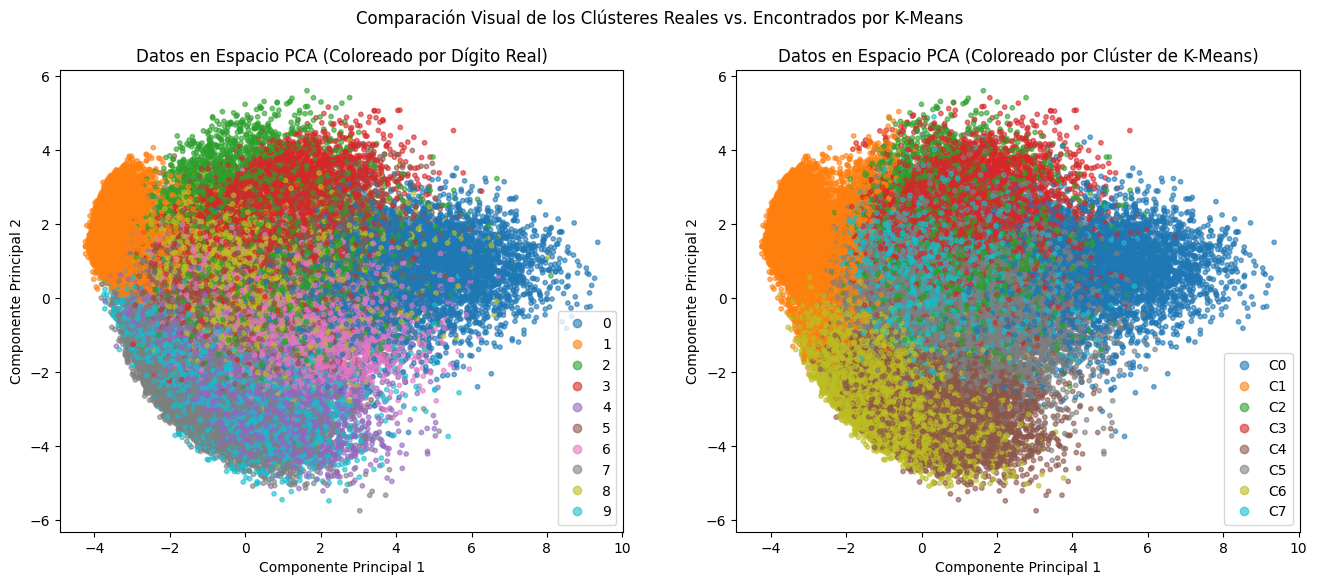

Generando Matriz de Confusión...


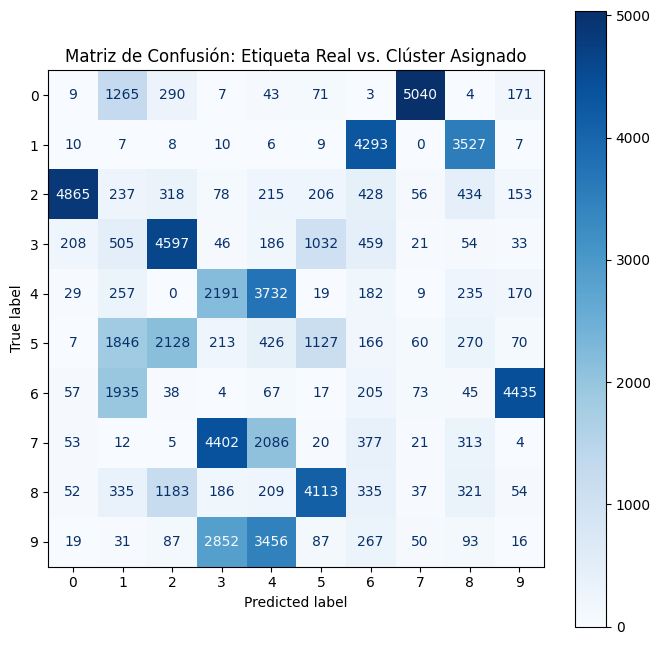

In [21]:
# --- 5. Visualización de los Resultados ---

# Gráfico 1: Scatter plot de los datos en los dos primeros componentes principales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Coloreado por etiquetas verdaderas
scatter1 = axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=mnist.target.astype(int), cmap='tab10', alpha=0.6, s=10)
axes[0].set_title('Datos en Espacio PCA (Coloreado por Dígito Real)')
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].legend(handles=scatter1.legend_elements()[0], labels=list(range(10)))

# Coloreado por clústeres encontrados por K-Means
scatter2 = axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=labels_pred, cmap='tab10', alpha=0.6, s=10)
axes[1].set_title('Datos en Espacio PCA (Coloreado por Clúster de K-Means)')
axes[1].set_xlabel('Componente Principal 1')
axes[1].set_ylabel('Componente Principal 2')
axes[1].legend(handles=scatter2.legend_elements()[0], labels=[f'C{i}' for i in range(10)])

plt.suptitle("Comparación Visual de los Clústeres Reales vs. Encontrados por K-Means")
plt.show()



Generando Matriz de Confusión...


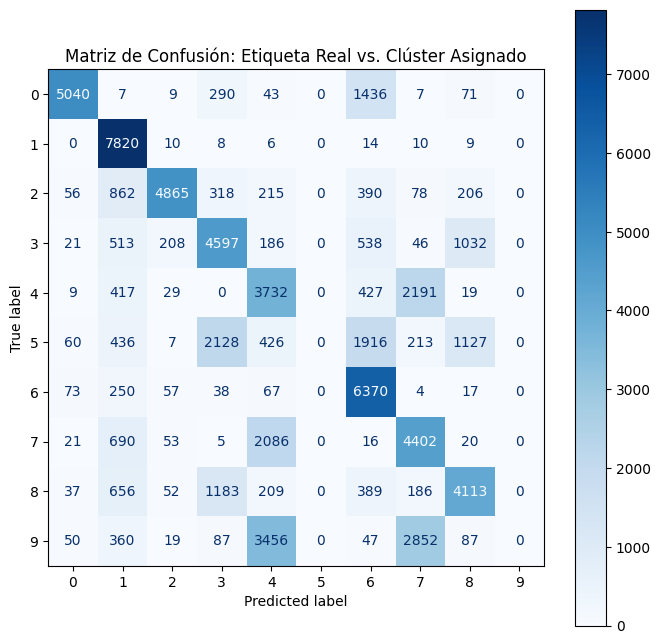

In [23]:
# Gráfico 2: Matriz de Confusión
print("Generando Matriz de Confusión...")
cm = confusion_matrix(mnist.target.astype(int), labels_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues')
plt.title("Matriz de Confusión: Etiqueta Real vs. Clúster Asignado")
plt.show()